##Reading the CSV file, and Preprocessing steps.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
import pandas as pd
import numpy as np

excel = pd.read_csv("/content/drive/MyDrive/Complaints.csv")

DF = pd.DataFrame(excel)
DF

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,RESOLUTION,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,NaN,NaN,NaN,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,NaN,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Technical,Internet,Technical complaint
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,CAS-549162-Y2F4X6,OnLine Prepaid,CBU,Prepaid,Resolved,No,NaN,23.04.2022 09:31,ABRAR,23.04.2022 09:31,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Commercial,Mobile,Commercial claim
10411,CAS-1094578-B7J7Z0,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,21.06.2022 19:40,AHMAD,21.06.2022 19:40,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
10412,CAS-470088-Q3Y2V7,FTTB Corporate,EBU,FTTB Corporate,Resolved,No,NaN,14.04.2022 14:36,YASMEEN,14.04.2022 14:36,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
10413,CAS-1249800-V2H6C7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,07.07.2022 05:54,ALANOUD,07.07.2022 05:54,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


_*This below statement is to check whether missing values happen to appear in columns_

In [5]:
null = DF.isnull().sum()
null

CASE_ID                       0
OFFER_NAME                 1293
CUSTOMER_TYPE                 0
CUSTOMER_GROUP             1348
CURRENT_STATUS                0
ESCALATION_FLAG               0
ESCALATED_GROUP            7055
OPEN_DATE                     0
OPEN_USER                   362
CLOSE_DATE                  119
CLOSE_GROUP                4890
CLOSE_USER                  516
AGE_BRACKET                 119
ACTUAL_COMPLAINT              0
CALLBACK_MECHANISM         7277
RESOLUTION                10336
RESOLUTION_DESCRIPTION    10376
CASE_DESC                  9243
OPEN_GR                    4561
COMPLAINT_TYPE                0
PRODUCT                       0
CASE                          0
dtype: int64

_*To start cleaning the data, we will start handling the missing data with the way I see fit. With a different cleaning statement for each column_

In [6]:
DF['AGE_BRACKET'] = DF['AGE_BRACKET'].fillna('0')
  

In [7]:
for z in range(len(DF)):
  if DF['OPEN_GR'].isnull().iloc[z] & DF['CLOSE_GROUP'].isnull().iloc[z]: 
    DF['OPEN_GR'].iloc[z] = DF['OPEN_GR'].fillna('Group Did Not Recieve Case').iloc[z]
    DF['CLOSE_GROUP'].iloc[z] = DF['CLOSE_GROUP'].fillna('Group Did Not Recieve Case').iloc[z]

  elif DF['OPEN_GR'].notnull().iloc[z]:
    DF['CLOSE_GROUP'].iloc[z] = DF['CLOSE_GROUP'].fillna('CYC_COMMERCAIL_TEAM').iloc[z]

  elif DF['CLOSE_GROUP'].notnull().iloc[z]:
    DF['OPEN_GR'].iloc[z] = DF['OPEN_GR'].fillna("CBU - CC 1st Layer AÂ ").iloc[z]

In [8]:
activedate = '1.1.2022 00:00'

for g in range(len(DF)):
  if DF['CURRENT_STATUS'].iloc[g] == 'Active':
    DF['CLOSE_DATE'].iloc[g] = DF['CLOSE_DATE'].fillna(activedate).iloc[g]

In [9]:
DF['OFFER_NAME'] = DF['OFFER_NAME'].fillna(DF['OFFER_NAME'].mode().iloc[0])

In [10]:
DF['CUSTOMER_GROUP'] = DF['CUSTOMER_GROUP'].fillna(DF['CUSTOMER_GROUP'].mode().iloc[0])

In [11]:
DF['OPEN_USER'] = DF['OPEN_USER'].fillna('Anonymous')

In [12]:
DF['CLOSE_USER'] = DF['CLOSE_USER'].fillna('Anonymous')

_*As the data scientist for the telecome company, I have decided to eliminate any columns that have above than 50% missing values without cleaning them_ 

In [13]:
del DF['RESOLUTION']

In [14]:
del DF['RESOLUTION_DESCRIPTION']

In [15]:
del DF['CASE_DESC']

In [16]:
del DF['ESCALATED_GROUP']

In [17]:
del DF['CASE_ID']

In [18]:
del DF['CALLBACK_MECHANISM']

In [19]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OFFER_NAME        10415 non-null  object
 1   CUSTOMER_TYPE     10415 non-null  object
 2   CUSTOMER_GROUP    10415 non-null  object
 3   CURRENT_STATUS    10415 non-null  object
 4   ESCALATION_FLAG   10415 non-null  object
 5   OPEN_DATE         10415 non-null  object
 6   OPEN_USER         10415 non-null  object
 7   CLOSE_DATE        10415 non-null  object
 8   CLOSE_GROUP       10415 non-null  object
 9   CLOSE_USER        10415 non-null  object
 10  AGE_BRACKET       10415 non-null  object
 11  ACTUAL_COMPLAINT  10415 non-null  object
 12  OPEN_GR           10415 non-null  object
 13  COMPLAINT_TYPE    10415 non-null  object
 14  PRODUCT           10415 non-null  object
 15  CASE              10415 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


In [20]:
DF.describe()

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,OPEN_DATE,OPEN_USER,CLOSE_DATE,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
count,10415,10415,10415,10415,10415,10415,10415,10415,10415,10415,10415.0,10415,10415,10415,10415,10415
unique,140,2,73,2,2,10045,272,9836,47,290,39.0,3,20,2,2,5
top,FTTH Home,CBU,FTTH Home,Resolved,No,17.04.2022 11:38,TCRMService,1.1.2022 00:00,Group Did Not Recieve Case,Anonymous,1.0,User Not Filled,Group Did Not Recieve Case,Technical,Internet,Technical complaint
freq,5207,10190,4996,10292,7020,3,1214,119,3966,516,9043.0,7277,3966,7952,7297,7654


In [21]:
DF.head()

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,OPEN_DATE,OPEN_USER,CLOSE_DATE,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,FTTH Home,CBU,FTTH Home,Resolved,Yes,19.06.2022 06:07,DANA,21.06.2022 13:41,F&I_BO,DANA,2.0,Actual Complaint,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,FTTH Home,CBU,FTTH Home,Resolved,Yes,04.04.2022 14:11,TCRMService,05.04.2022 12:13,Mobile_BO,ENNAS,1.0,Not Actual Complaint,System Administrator,Commercial,Mobile,Commercial claim
2,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,CYC_COMMERCAIL_TEAM,MOUTAZ,1.0,User Not Filled,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,FTTH Home,CBU,FTTH Home,Resolved,No,18.06.2022 20:38,MOATH,18.06.2022 20:38,Group Did Not Recieve Case,MOATH,1.0,User Not Filled,Group Did Not Recieve Case,Technical,Internet,Technical complaint
4,FTTH Home,CBU,FTTH Home,Resolved,No,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,CYC_COMMERCAIL_TEAM,IBRAHIM,1.0,User Not Filled,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


_*Now, that we've cleaned the data, the following statement is to check whether missing values still exist within the DataFrame_ 

In [22]:
null = DF.isnull().sum()
null

OFFER_NAME          0
CUSTOMER_TYPE       0
CUSTOMER_GROUP      0
CURRENT_STATUS      0
ESCALATION_FLAG     0
OPEN_DATE           0
OPEN_USER           0
CLOSE_DATE          0
CLOSE_GROUP         0
CLOSE_USER          0
AGE_BRACKET         0
ACTUAL_COMPLAINT    0
OPEN_GR             0
COMPLAINT_TYPE      0
PRODUCT             0
CASE                0
dtype: int64

##Changing the categorical data into numerical data

In [23]:
categories = DF.select_dtypes(['object']).columns
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
DF[categories] = DF[categories].apply(lambda x: pd.factorize(x)[0])

DF.head()

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,OPEN_DATE,OPEN_USER,CLOSE_DATE,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1
2,1,0,1,0,1,2,2,2,2,2,1,2,2,0,0,0
3,0,0,0,0,1,3,3,3,3,3,1,2,3,0,0,0
4,0,0,0,0,1,4,4,4,2,4,1,2,2,0,0,0


##We Should Slice the data by using Train_test_split

In [24]:
x2 = DF.drop(['COMPLAINT_TYPE', 'ESCALATION_FLAG' , 'ACTUAL_COMPLAINT', 'CLOSE_DATE' , 'OPEN_DATE'], axis = 1)
y2 = DF['COMPLAINT_TYPE']

x_train , x_test , y_train , y_test = train_test_split(x2 , y2 , test_size = 0.2)

##First Model: GaussianNB


In [25]:
from numpy.core.numerictypes import nbytes
NB = GaussianNB()
NB_acc = []
NB_rca = []
NB_prc = []
NB_f1 = []

for f in range(30):
  NB = NB.fit(x_train , y_train)

  y_pred = NB.predict(x_test)

  acc1 = accuracy_score(y_test , y_pred)
  NB_acc.append(acc1)

  rca1 = recall_score(y_test , y_pred)
  NB_rca.append(rca1)

  prc1 = precision_score(y_test , y_pred)
  NB_prc.append(prc1)

  f1_1 = f1_score(y_test , y_pred)
  NB_f1.append(f1_1)

nbacc = sum(NB_acc)/len(NB_acc)
nbprc = sum(NB_prc)/len(NB_prc)
nbrca = sum(NB_rca)/len(NB_rca)
nbf1  = sum(NB_f1)/len(NB_f1)


In [26]:
print('Accuracy: ', nbacc)
print("Precision: ", nbprc)
print("Recall: ", nbrca)
print("F1_score: ", nbf1)

Accuracy:  0.8319731156985112
Precision:  0.6531914893617025
Recall:  0.6214574898785427
F1_score:  0.6369294605809125


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1589
           1       0.65      0.62      0.64       494

    accuracy                           0.83      2083
   macro avg       0.77      0.76      0.76      2083
weighted avg       0.83      0.83      0.83      2083



##Second Model: Decision Tree



In [28]:
DT = DecisionTreeClassifier()

DT_acc = []
DT_rca = []
DT_prc = []
DT_f1 = []

for o in range(30):
  DT.fit(x_train , y_train)
  y_pred = DT.predict(x_test)

  acc2 = accuracy_score(y_test , y_pred)
  DT_acc.append(acc2)

  rca2 = recall_score(y_test , y_pred)
  DT_rca.append(rca2)

  prc2 = precision_score(y_test , y_pred)
  DT_prc.append(prc2)

  f1_2 = f1_score(y_test , y_pred)
  DT_f1.append(f1_2)

dtacc = sum(DT_acc)/len(DT_acc)
dtprc = sum(DT_prc)/len(DT_prc)
dtrca = sum(DT_rca)/len(DT_rca)
dtf1  = sum(DT_f1)/len(DT_f1)

In [29]:
print('Accuracy: ', dtacc)
print("Precision: ", dtprc)
print("Recall: ", dtrca)
print("F1_score: ", dtf1)

Accuracy:  0.9899343895023202
Precision:  0.9793962451884012
Recall:  0.9781376518218626
F1_score:  0.9787656396316865


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1589
           1       0.98      0.98      0.98       494

    accuracy                           0.99      2083
   macro avg       0.98      0.99      0.98      2083
weighted avg       0.99      0.99      0.99      2083



##Third Model: KNeighborsClassifier



In [31]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn_acc = []
knn_rca = []
knn_prc = []
knn_f1 = []

for m in range(30):

  knn.fit(x_train , y_train)

  y_pred = knn.predict(x_test)  

  acc3 = accuracy_score(y_test , y_pred)
  knn_acc.append(acc3)

  rca3 = recall_score(y_test , y_pred)
  knn_rca.append(rca3)

  prc3 = precision_score(y_test , y_pred)
  knn_prc.append(prc3)

  f1_3 = f1_score(y_test , y_pred)
  knn_f1.append(f1_3)

knnacc = sum(knn_acc)/len(knn_acc)
knnprc = sum(knn_prc)/len(knn_prc)
knnrca = sum(knn_rca)/len(knn_rca)
knnf1  = sum(knn_f1)/len(knn_f1)

In [32]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.to_csv('out.csv')
df




,Actual,Predicted
6223,0,0
9069,1,1
1287,1,1
7150,0,0
4939,0,0
...,...,...
10342,0,0
6241,0,0
9955,1,1
1052,0,0


In [33]:
print('Accuracy: ', knnacc)
print('Precision: ', knnprc)
print('Recall: ', knnrca)
print('F1_score: ', knnf1)


Accuracy:  0.9006240998559772
Precision:  0.8224719101123592
Recall:  0.7408906882591094
F1_score:  0.7795527156549521


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1589
           1       0.82      0.74      0.78       494

    accuracy                           0.90      2083
   macro avg       0.87      0.85      0.86      2083
weighted avg       0.90      0.90      0.90      2083



##Fourth Model: Logistic Regression

In [35]:
LR = LogisticRegression(max_iter = 1500)

LR_acc = []
LR_rca = []
LR_prc = []
LR_f1 = []

for b in range(10):
  LR.fit(x_train , y_train)
  y_pred = LR.predict(x_test)

  acc4 = accuracy_score(y_test , y_pred)
  LR_acc.append(acc4)

  rca4 = recall_score(y_test , y_pred)
  LR_rca.append(rca4)

  prc4 = precision_score(y_test , y_pred)
  LR_prc.append(prc4)

  f1_4 = f1_score(y_test , y_pred)
  LR_f1.append(f1_4)

lracc = sum(LR_acc)/len(LR_acc)
lrprc = sum(LR_prc)/len(LR_prc)
lrrca = sum(LR_rca)/len(LR_rca)
lrf1  = sum(LR_f1)/len(LR_f1)

In [36]:
print('Accuracy: ', lracc)
print("Precision: ", lrprc)
print("Recall: ", lrrca)
print("F1_score: ", lrf1)

Accuracy:  0.9414306289006242
Precision:  0.8576923076923075
Recall:  0.902834008097166
F1_score:  0.8796844181459564


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1589
           1       0.86      0.90      0.88       494

    accuracy                           0.94      2083
   macro avg       0.91      0.93      0.92      2083
weighted avg       0.94      0.94      0.94      2083



#Bar plot to show how each model is evaluated with its characteristics

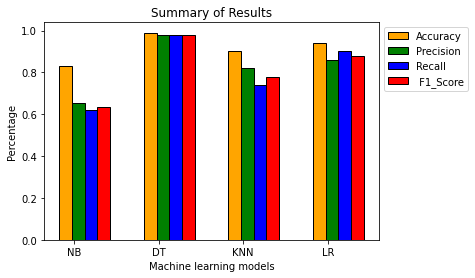

In [38]:
mlm_name = ['NB' , 'DT' , 'KNN' , 'LR']

mlm_acc = [nbacc , dtacc , knnacc , lracc]
mlm_prc = [nbprc , dtprc , knnprc , lrprc]
mlm_rca = [nbrca , dtrca , knnrca , lrrca]
mlm_f1  = [nbf1 , dtf1 , knnf1 , lrf1]

x_axis = np.arange(len(mlm_name))

plt.bar(x_axis+0.15 , mlm_acc , color = 'orange' , width =0.15, edgecolor = 'black' , label = 'Accuracy')
plt.bar(x_axis+0.3 , mlm_prc , color ='green' , width = 0.15 , edgecolor = 'black' , label = 'Precision')
plt.bar(x_axis+0.45,mlm_rca,color ='blue',  width = 0.15 , edgecolor = 'black' , label = 'Recall')
plt.bar(x_axis+0.6 , mlm_f1 , color = 'red' , width = 0.15 , edgecolor = 'black' , label = ' F1_Score')
plt.xticks(x_axis+0.25, mlm_name)
plt.legend(bbox_to_anchor=(1,1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()


#Box plot to show the model evaluation measures. And how each measure is shown

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


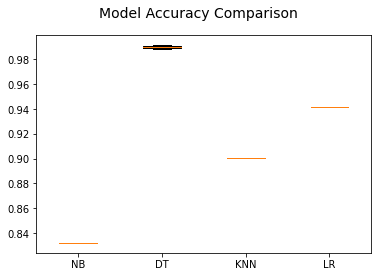

In [39]:
acc_NB = np.array(NB_acc)
acc_DT = np.array(DT_acc)
acc_KNN = np.array(knn_acc)
acc_LR  = np.array(LR_acc)

dict = {'NB' : acc_NB , 'DT' : acc_DT , 'KNN' : acc_KNN , 'LR' : acc_LR}

fig, ax = plt.subplots()
fig.suptitle('Model Accuracy Comparison' , fontsize = 14)
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.show()


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


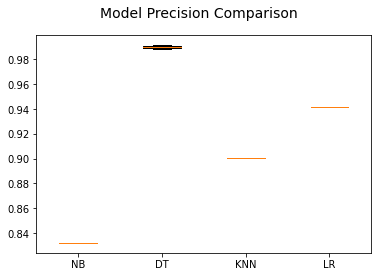

In [40]:
prc_NB = np.array(NB_prc)
prc_DT = np.array(DT_prc)
prc_KNN = np.array(knn_prc)
prc_LR = np.array(LR_prc)

prcdict = {'NB' : prc_NB , 'DT' : prc_DT , 'KNN' : prc_KNN , 'LR' : prc_LR}

fig, ax = plt.subplots()
fig.suptitle('Model Precision Comparison' , fontsize = 14)
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


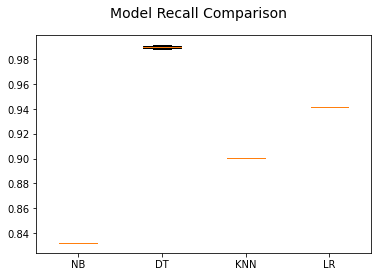

In [41]:
rca_NB = np.array(NB_rca)
rca_DT = np.array(DT_rca)
rca_KNN = np.array(knn_rca)
rca_LR = np.array(LR_rca)

rcadict = {'NB' : rca_NB , 'DT' : rca_DT , 'KNN' : rca_KNN, 'LR' : rca_LR}

fig, ax = plt.subplots()
fig.suptitle('Model Recall Comparison' , fontsize = 14)
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


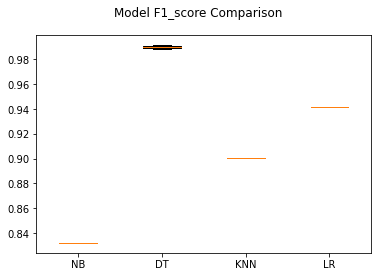

In [42]:
f1_NB = np.array(NB_f1)
f1_DT = np.array(DT_f1)
f1_KNN = np.array(knn_f1)
f1_LR = np.array(LR_f1)

f1dict = {'NB' : f1_NB , 'DT' :f1_DT , 'KNN' : f1_KNN , 'LR' : f1_LR}


fig, ax = plt.subplots()
fig.suptitle('Model F1_score Comparison')
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
plt.show()

#Radar chart to show the difference between the four models above, KNN , DT , NB , LR, using the model evaluating measures

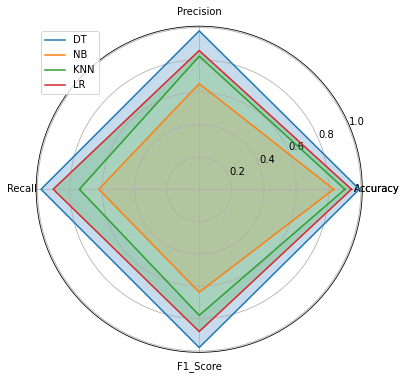

In [43]:
cats = ['Accuracy' , 'Precision' , 'Recall' , 'F1_Score']
NB = [nbacc , nbprc , nbrca , nbf1]
DT = [dtacc , dtprc , dtrca , dtf1]
KNN = [knnacc , knnprc , knnrca , knnf1]
LR = [lracc , lrprc , lrrca , lrf1]

angle1 = np.linspace(start=0, stop=2 * np.pi,  num=len(DT), endpoint=False)

DT.append(DT[0])
NB.append(NB[0])
KNN.append(KNN[0])
LR.append(LR[0])
cats.append(cats[0])
angle1=np.concatenate((angle1,[angle1[0]]))

plt.figure(figsize=(6,6))
plt.subplot(polar = True)

plt.plot(angle1 , DT, label = 'DT')
plt.fill(angle1,DT,alpha = 0.25)
plt.plot(angle1 , NB, label = 'NB')
plt.fill(angle1,NB,alpha = 0.25)
plt.plot(angle1, KNN, label = 'KNN')
plt.fill(angle1,KNN,alpha = 0.25,color = 'white')
plt.plot(angle1, LR, label = 'LR')
plt.fill(angle1,LR,alpha = 0.25)

plt.thetagrids(np.degrees(angle1) , labels = cats)

plt.legend()
plt.show()